<a href="https://colab.research.google.com/github/poojamahajan0712/s9/blob/master/Quiz__S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 18:27:40.657828


In [12]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image
import quizdnn1

#from transform_func import transform1
from data_load_cifar10 import dataload
from util import *
#import resnet
from train import train
from test2 import test
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
from aug__new_albumv2 import album_train,album_test
#from utils import *
#from gradcam import GradCAM



  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-pbiwru9y
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-pbiwru9y
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=34f3191063766c96f19e80a3e8f392a653bfdcef894d104676b212c00e00fee0
  Stored in directory: /tmp/pip-ephem-wheel-cache-4lxesyud/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [13]:

    
trainloader,testloader,classes =dataload(train_transform=album_train(),test_transorm=album_test())


Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 ship plane  bird   car


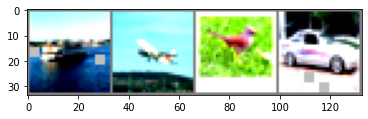

In [14]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4],padding=1))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [16]:

device = which_device()
net = quizdnn1.Net().to(device)
show_model_summary(net, device, (3,32,32))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 64, 32, 32]          18,432
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,728
              ReLU-9          [-1, 128, 16, 16]               0
      BatchNorm2d-10          [-1, 128, 16, 16]             256
           Conv2d-11          [-1, 128, 16, 16]         147,456
             ReLU-12          [-1, 128, 16, 16]               0
      BatchNorm2d-13          [-1, 128, 16, 16]             256
           Conv2d-14           [-1, 64,

 **Define a Loss function and optimizer** 


**Training and Testing**





In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
def run():
  test_losses=[]
  test_accs=[]
  for epoch in range(40):
      print("EPOCH:", epoch+1)
      train(net, device, trainloader, criterion, optimizer, epoch)
      test(net, device, testloader, criterion, classes, test_losses, test_accs)
  

run()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4599723815917969 Batch_id=390 Accuracy=41.97: 100%|██████████| 391/391 [00:17<00:00, 22.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0104, Accuracy: 5269/10000 (52.69%)

EPOCH: 2


Loss=1.098733901977539 Batch_id=390 Accuracy=58.28: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0090, Accuracy: 5916/10000 (59.16%)

EPOCH: 3


Loss=0.9868210554122925 Batch_id=390 Accuracy=64.25: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 6629/10000 (66.29%)

EPOCH: 4


Loss=0.6758124232292175 Batch_id=390 Accuracy=68.84: 100%|██████████| 391/391 [00:17<00:00, 27.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7037/10000 (70.37%)

EPOCH: 5


Loss=0.7853406667709351 Batch_id=390 Accuracy=72.07: 100%|██████████| 391/391 [00:17<00:00, 25.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7256/10000 (72.56%)

EPOCH: 6


Loss=0.719469428062439 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0059, Accuracy: 7408/10000 (74.08%)

EPOCH: 7


Loss=0.6537749171257019 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7546/10000 (75.46%)

EPOCH: 8


Loss=0.6425467729568481 Batch_id=390 Accuracy=79.00: 100%|██████████| 391/391 [00:18<00:00, 20.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7702/10000 (77.02%)

EPOCH: 9


Loss=0.5516034364700317 Batch_id=390 Accuracy=80.63: 100%|██████████| 391/391 [00:18<00:00, 21.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7854/10000 (78.54%)

EPOCH: 10


Loss=0.5304659605026245 Batch_id=390 Accuracy=81.96: 100%|██████████| 391/391 [00:18<00:00, 24.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7890/10000 (78.90%)

EPOCH: 11


Loss=0.5053717494010925 Batch_id=390 Accuracy=83.16: 100%|██████████| 391/391 [00:18<00:00, 21.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 7969/10000 (79.69%)

EPOCH: 12


Loss=0.48459476232528687 Batch_id=390 Accuracy=84.19: 100%|██████████| 391/391 [00:18<00:00, 26.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8025/10000 (80.25%)

EPOCH: 13


Loss=0.3821714520454407 Batch_id=390 Accuracy=85.09: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8033/10000 (80.33%)

EPOCH: 14


Loss=0.6347826719284058 Batch_id=390 Accuracy=85.87: 100%|██████████| 391/391 [00:18<00:00, 21.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8124/10000 (81.24%)

EPOCH: 15


Loss=0.5401960015296936 Batch_id=390 Accuracy=86.51: 100%|██████████| 391/391 [00:18<00:00, 25.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8134/10000 (81.34%)

EPOCH: 16


Loss=0.3922860324382782 Batch_id=390 Accuracy=87.61: 100%|██████████| 391/391 [00:18<00:00, 25.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7934/10000 (79.34%)

EPOCH: 17


Loss=0.30262061953544617 Batch_id=390 Accuracy=87.91: 100%|██████████| 391/391 [00:18<00:00, 25.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8297/10000 (82.97%)

EPOCH: 18


Loss=0.2129516899585724 Batch_id=390 Accuracy=88.78: 100%|██████████| 391/391 [00:18<00:00, 25.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8231/10000 (82.31%)

EPOCH: 19


Loss=0.24990549683570862 Batch_id=390 Accuracy=89.29: 100%|██████████| 391/391 [00:18<00:00, 21.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8168/10000 (81.68%)

EPOCH: 20


Loss=0.33752763271331787 Batch_id=390 Accuracy=89.68: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8255/10000 (82.55%)

EPOCH: 21


Loss=0.2335834801197052 Batch_id=390 Accuracy=90.21: 100%|██████████| 391/391 [00:18<00:00, 21.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8327/10000 (83.27%)

EPOCH: 22


Loss=0.2984279990196228 Batch_id=390 Accuracy=91.03: 100%|██████████| 391/391 [00:18<00:00, 21.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8232/10000 (82.32%)

EPOCH: 23


Loss=0.2086137980222702 Batch_id=390 Accuracy=91.34: 100%|██████████| 391/391 [00:18<00:00, 20.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8225/10000 (82.25%)

EPOCH: 24


Loss=0.3244454264640808 Batch_id=390 Accuracy=91.69: 100%|██████████| 391/391 [00:17<00:00, 26.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8343/10000 (83.43%)

EPOCH: 25


Loss=0.200831800699234 Batch_id=390 Accuracy=92.30: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8349/10000 (83.49%)

EPOCH: 26


Loss=0.14557601511478424 Batch_id=390 Accuracy=92.75: 100%|██████████| 391/391 [00:17<00:00, 25.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8344/10000 (83.44%)

EPOCH: 27


Loss=0.2596936821937561 Batch_id=390 Accuracy=92.76: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8339/10000 (83.39%)

EPOCH: 28


Loss=0.2091081440448761 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [00:18<00:00, 21.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8312/10000 (83.12%)

EPOCH: 29


Loss=0.20300531387329102 Batch_id=390 Accuracy=93.67: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8237/10000 (82.37%)

EPOCH: 30


Loss=0.10819653421640396 Batch_id=390 Accuracy=93.90: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8364/10000 (83.64%)

EPOCH: 31


Loss=0.15511015057563782 Batch_id=390 Accuracy=94.37: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8338/10000 (83.38%)

EPOCH: 32


Loss=0.17550480365753174 Batch_id=390 Accuracy=94.57: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8367/10000 (83.67%)

EPOCH: 33


Loss=0.17956353724002838 Batch_id=390 Accuracy=94.79: 100%|██████████| 391/391 [00:18<00:00, 25.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8425/10000 (84.25%)

EPOCH: 34


Loss=0.16839750111103058 Batch_id=390 Accuracy=95.03: 100%|██████████| 391/391 [00:18<00:00, 21.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8386/10000 (83.86%)

EPOCH: 35


Loss=0.2238156497478485 Batch_id=390 Accuracy=95.01: 100%|██████████| 391/391 [00:18<00:00, 26.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8312/10000 (83.12%)

EPOCH: 36


Loss=0.2063203603029251 Batch_id=390 Accuracy=95.39: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8412/10000 (84.12%)

EPOCH: 37


Loss=0.1299116313457489 Batch_id=390 Accuracy=95.50: 100%|██████████| 391/391 [00:18<00:00, 25.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8457/10000 (84.57%)

EPOCH: 38


Loss=0.22328832745552063 Batch_id=390 Accuracy=95.70: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8445/10000 (84.45%)

EPOCH: 39


Loss=0.0895506888628006 Batch_id=390 Accuracy=96.21: 100%|██████████| 391/391 [00:18<00:00, 21.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8414/10000 (84.14%)

EPOCH: 40


Loss=0.10903330892324448 Batch_id=390 Accuracy=96.43: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]


Test set: Average loss: 0.0045, Accuracy: 8294/10000 (82.94%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse  frog   car  ship


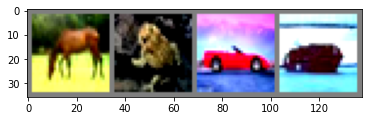

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
model_dict = dict(type='resnet', arch=net, layer_name='layer4', input_size=(32,32))
gradcam = GradCAM(model_dict)
# get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
p=images[:1]
#print(p.shape)

torch_img = torch.from_numpy(np.asarray(p)).permute(0, 3, 1, 2).reshape(3, 32, 32).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)

normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
normed_img = normalizer(torch_img)

#print(type(normed_img))

# get a GradCAM saliency map on the class index 10.
mask, logit = gradcam(normed_img, class_idx=1)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, torch_img)

torch.Size([1, 3, 32, 32])
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


TypeError: ignored

Okay, now let us see what the neural network thinks these examples above are:
The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:


In [0]:
images=images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.

